# Searching for Scenes by geojson location and date range.
## Step 1: Setup

Import the Data Api wrapper.

In [1]:
from cast_planet import DataAPI
api = DataAPI(api_key='PLAKc6e06068503b45989b8b13138a692582')


Create a geometry filter for an AOI. This is using a simple bounding box.

In [2]:
from cast_planet.data.filters.field import GeometryFilter

aoi_bounding_box = {
  "type": "Polygon",
  "properties": {
    "name": "Area of Interest - Arkansas River at Little Rock"
  },
  "coordinates": [
      [
        [-92.407, 34.734],
        [-92.407, 34.841],
        [-92.194, 34.841],
        [-92.194, 34.734],
        [-92.407, 34.734]
      ]
    ]
}
aoi_filter = GeometryFilter(field_name='geometry', config=aoi_bounding_box)

Create a date range filter that matches the date/times of interest.

In [3]:
from cast_planet.data.filters.field import DateRangeFilter

start_time = '2023-01-01T00:00'
end_time = '2023-07-01T00:00'

date_filter = DateRangeFilter(field_name='acquired', config={'gte': start_time, 'lte': end_time})

Combine the two filters into a single 'AndFilter' so that all scenes must meet both criteria.

In [4]:
from cast_planet.data.filters.logical import AndFilter

search_filter = AndFilter(config=[aoi_filter,date_filter])

## Step 2: Use the quick_search method to find available scenes.
This returns a [QuickSearchResponse](https://cast.git-pages.uark.edu/planet/planet-python-api/cast_planet/data/index.html#cast_planet.data.models.QuickSearchResponse) model.

In [5]:
response = api.quick_search(item_types=['PSScene'], search_filter=search_filter)

The 'features' property contains all the scenes found during the search.

In [6]:
len(response.features)

474

## Optional: Further filter the data using the QuickSearchResponse 'filter' method

Define a filtering method that takes in a [QuickSearchItem](https://cast.git-pages.uark.edu/planet/planet-python-api/cast_planet/data/index.html#cast_planet.data.models.QuickSearchItem) and returns a boolean. Here we will create method that assess whether the item meets our desired cloud cover threshold.

In [7]:
from cast_planet.data.models import QuickSearchItem

def cloud_cover_filter(item: QuickSearchItem):
  return item.properties['cloud_cover'] < .10

Apply the filter. Now we have weeded out all the overly cloudy scenes.

In [8]:
scenes =  response.filter(cloud_cover_filter)
len(scenes)

276

## Step 3: Retrieving a chosen scene.
### Optional: Preview the scene.
Let's preview the first scene returned from the search.

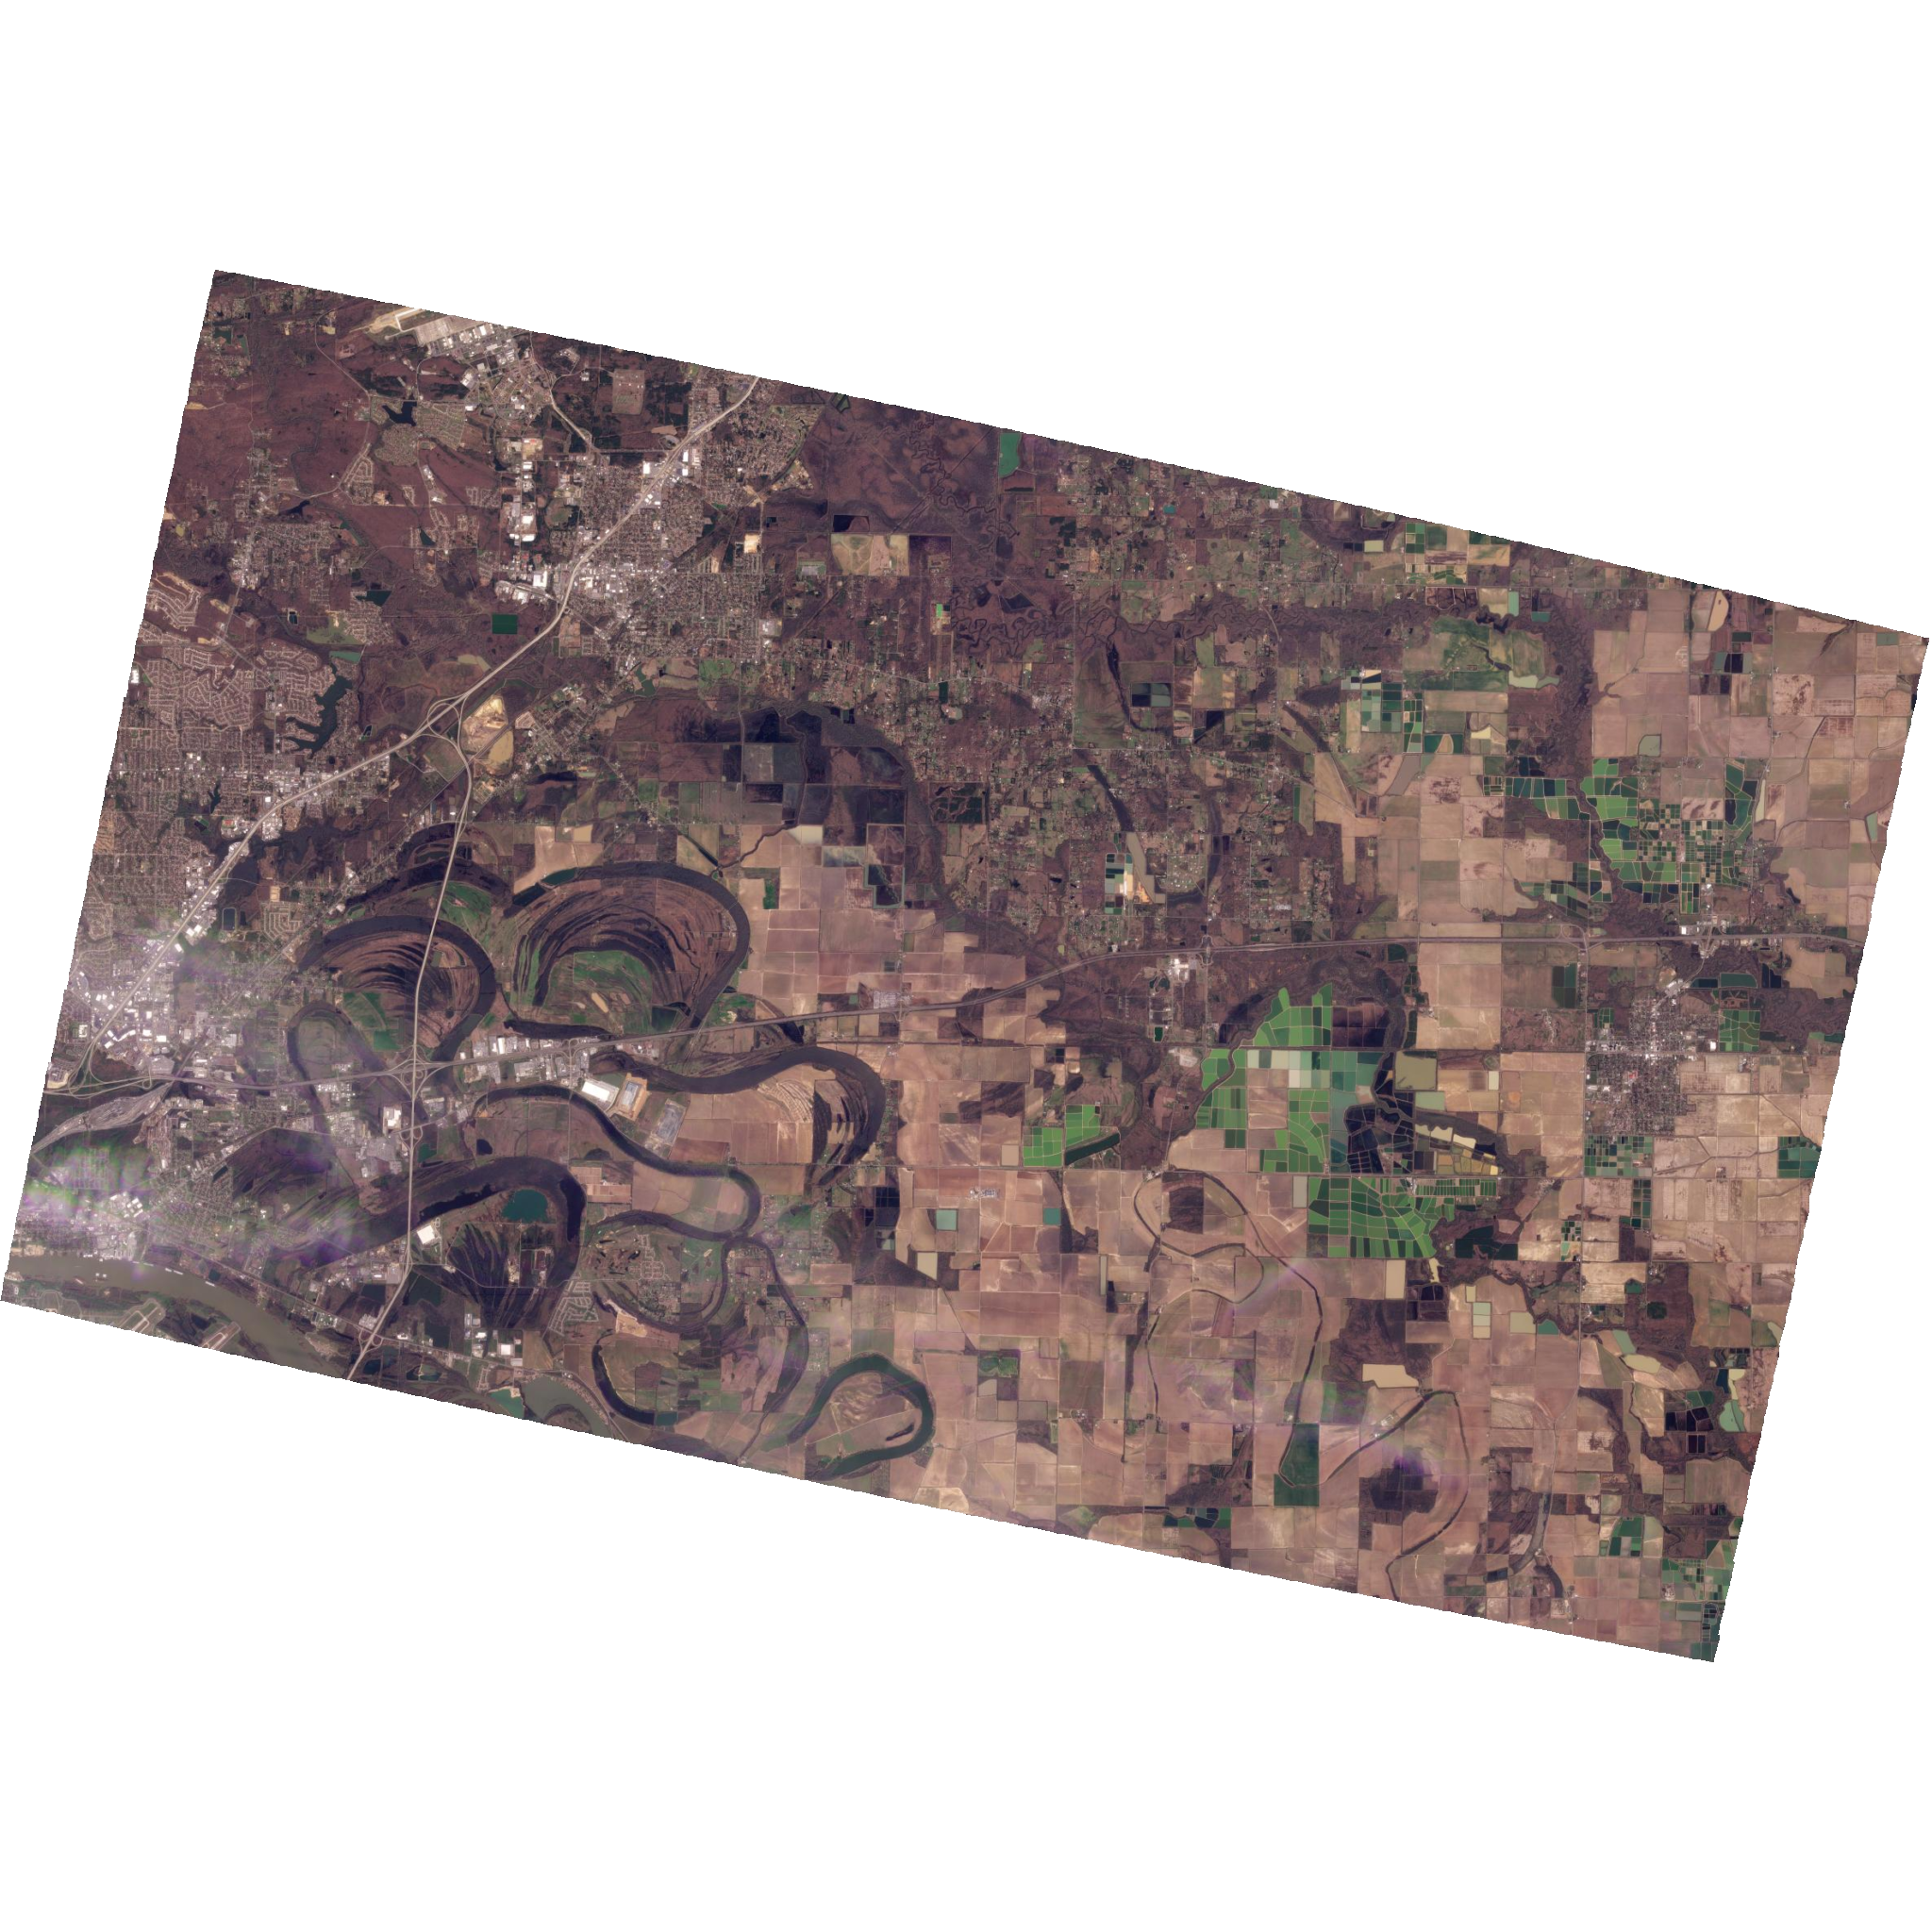

In [9]:
api.jupyter_preview(scenes[0])

Well look at that, the Arkansas river is in the bottom left corner of our scene. 

### Download a scene
View the avaiable assets for this item

In [10]:
scenes[0].assets

['basic_analytic_4b',
 'basic_analytic_4b_rpc',
 'basic_analytic_4b_xml',
 'basic_analytic_8b',
 'basic_analytic_8b_xml',
 'basic_udm2',
 'ortho_analytic_4b',
 'ortho_analytic_4b_sr',
 'ortho_analytic_4b_xml',
 'ortho_analytic_8b',
 'ortho_analytic_8b_sr',
 'ortho_analytic_8b_xml',
 'ortho_udm2',
 'ortho_visual']

#### Before downloading we must activate the item asset.
This begins the activation process on the Planet side, once the activation is complete, your asset will be available for download.

In [11]:
asset =  api.activate_item_asset(scenes[0], 'ortho_visual')
asset.status.name

'activating'

Activation may take several minutes. To check the activation status, use the 'check_asset_status' method.

In [12]:
asset = api.check_asset_status(asset)
asset.status.name

'active'

When the status is 'active', you may begin the download.

In [13]:
api.download_item_asset(asset, folder='./downloaded_assets')

./downloaded_assets/20230315_162945_13_2474_3B_Visual.tif: 100%|##########| 246M/246M [00:09<00:00, 27.2MB/s] 


'./downloaded_assets/20230315_162945_13_2474_3B_Visual.tif'

Congratulations! You have successfully used the cast_planet python api to access the Planet DataAPI.
<br/><br/>
Happy Researching!